<a href="https://colab.research.google.com/github/Deepika1454/Audio-Classification-with-Pre-trained-Model/blob/main/contour_segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow  # For image display in Colab

from google.colab import files
uploaded = files.upload()


Saving OIP.webp to OIP.webp


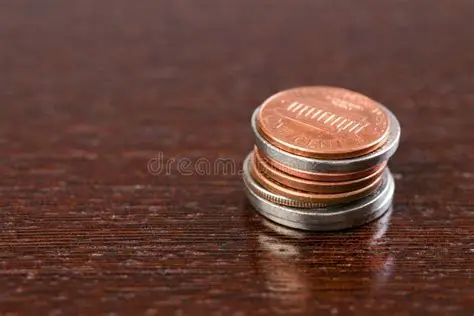

In [3]:

image_path = next(iter(uploaded))
img = cv2.imread(image_path)
cv2_imshow(img)


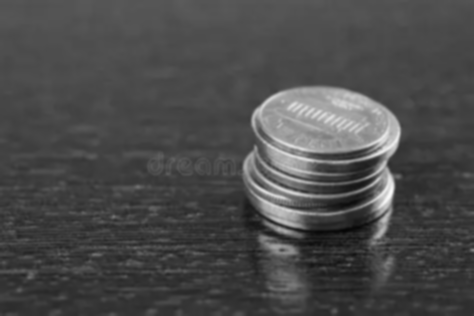

In [4]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

cv2_imshow(blurred)


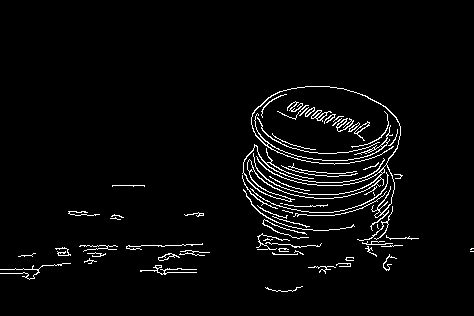

In [5]:

edges = cv2.Canny(blurred, threshold1=50, threshold2=150)
cv2_imshow(edges)


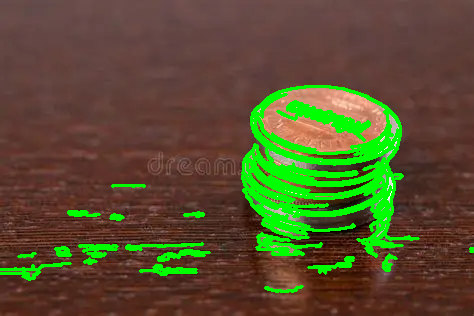

Total contours detected: 68


In [6]:

contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

cv2_imshow(contour_img)
print(f"Total contours detected: {len(contours)}")


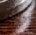

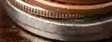

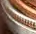

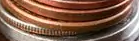

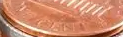

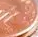

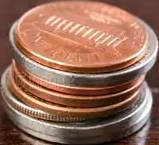

In [7]:

for i, c in enumerate(contours):
    x, y, w, h = cv2.boundingRect(c)
    roi = img[y:y+h, x:x+w]
    cv2_imshow(roi)
